In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"
%cd $PROJECT_PATH


/content/drive/MyDrive/loan_recovery_ai


In [ ]:
import sys
sys.path.append(PROJECT_PATH)


In [ ]:
import os

init_file_path = os.path.join(PROJECT_PATH, 'risk_engine', '__init__.py')

if not os.path.exists(init_file_path):
    # Create an empty __init__.py file
    with open(init_file_path, 'w') as f:
        pass
    print(f"Created empty __init__.py at {init_file_path}")
else:
    print(f"__init__.py already exists at {init_file_path}")

# Now, re-attempt the import after ensuring __init__.py exists
from risk_engine.dpd_rules import get_dpd_bucket, get_risk_severity, dpd_summary

test_dpds = [10, 45, 75, 120]

for d in test_dpds:
    print(dpd_summary(d))

Created empty __init__.py at /content/drive/MyDrive/loan_recovery_ai/risk_engine/__init__.py
{'dpd': 10, 'dpd_bucket': 'Standard', 'risk_severity': 'Low'}
{'dpd': 45, 'dpd_bucket': 'SMA-1', 'risk_severity': 'Medium'}
{'dpd': 75, 'dpd_bucket': 'SMA-2', 'risk_severity': 'High'}
{'dpd': 120, 'dpd_bucket': 'NPA', 'risk_severity': 'Critical'}


In [ ]:
import os

file_path = '/content/drive/MyDrive/loan_recovery_ai/risk_engine/dpd_rules.py'
if os.path.exists(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")

The file /content/drive/MyDrive/loan_recovery_ai/risk_engine/dpd_rules.py exists.


In [ ]:
from risk_engine.dpd_rules import get_dpd_bucket, get_risk_severity

print("Example usage of get_dpd_bucket:")
print(f"DPD 20: {get_dpd_bucket(20)}")
print(f"DPD 50: {get_dpd_bucket(50)}")
print(f"DPD 90: {get_dpd_bucket(90)}")

print("\nExample usage of get_risk_severity:")
print(f"DPD 20: {get_risk_severity(20)}")
print(f"DPD 50: {get_risk_severity(50)}")
print(f"DPD 90: {get_risk_severity(90)}")


Example usage of get_dpd_bucket:
DPD 20: Standard
DPD 50: SMA-1
DPD 90: SMA-2

Example usage of get_risk_severity:
DPD 20: Low
DPD 50: Medium
DPD 90: High


In [ ]:
import pandas as pd
from decision_engine.strategy import recommend_action

# Sample Indian-style loan data
data = {
    "loan_amount": [50000, 150000, 300000, 80000],
    "dpd": [10, 45, 75, 120]
}

df = pd.DataFrame(data)
df["recommended_action"] = df.apply(recommend_action, axis=1)

df


,loan_amount,dpd,recommended_action
0,50000,10,SMS_REMINDER
1,150000,45,IVR_CALL
2,300000,75,FIELD_VISIT
3,80000,120,LEGAL_NOTICE


In [ ]:
import os

file_path = '/content/drive/MyDrive/loan_recovery_ai/risk_engine/model.py'
if os.path.exists(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")

The file /content/drive/MyDrive/loan_recovery_ai/risk_engine/model.py exists.


In [ ]:
from risk_engine.model import predict_risk


ModuleNotFoundError: No module named 'risk_engine.model'

In [ ]:
file_path = '/content/drive/MyDrive/loan_recovery_ai/risk_engine/model.py'

try:
    with open(file_path, 'r') as f:
        content = f.read()
    print(content)
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

"""
model.py
-----------------
Simple, explainable risk scoring model
Designed for Indian NBFC-style lending use cases
"""

import numpy as np

def predict_risk(df):
    """
    Predict risk score for each loan
    
    Expected columns:
    - loan_amount
    - monthly_income
    - emi
    - tenure_months
    - interest_rate
    """

    # Normalize features (simple, transparent)
    emi_income_ratio = df["emi"] / (df["monthly_income"] + 1)
    loan_size_factor = df["loan_amount"] / 1_000_000
    tenure_factor = df["tenure_months"] / 60
    interest_factor = df["interest_rate"] / 30

    # Weighted risk score (business-inspired)
    risk_score = (
        0.4 * emi_income_ratio +
        0.25 * loan_size_factor +
        0.2 * tenure_factor +
        0.15 * interest_factor
    )

    return np.clip(risk_score, 0, 1)



In [ ]:
# ====== FULL COLAB SETUP + IMPORT (ONE CELL) ======

# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Set project root
import os, sys

PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"
os.chdir(PROJECT_PATH)
sys.path.insert(0, PROJECT_PATH)  # insert at top to avoid conflicts

# 3. Debug prints (important)
print("Current directory:", os.getcwd())
print("Project files:", os.listdir(PROJECT_PATH))
print("risk_engine files:", os.listdir(os.path.join(PROJECT_PATH, "risk_engine")))

# 4. Import test
from risk_engine.model import predict_risk

print("✅ predict_risk imported successfully")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current directory: /content/drive/MyDrive/loan_recovery_ai
Project files: ['data', 'notebooks', 'risk_engine', 'decision_engine', 'explainability', 'utils', 'models']
risk_engine files: ['dpd_rules.py', '__init__.py', '__pycache__', 'model.py']


ModuleNotFoundError: No module named 'risk_engine.model'

In [ ]:
# ===== FORCE LOAD model.py (COLAB SAFE METHOD) =====

import importlib.util
import sys
from google.colab import drive

# Mount drive (safe even if already mounted)
drive.mount('/content/drive', force_remount=True)

# Absolute path to model.py
MODEL_PATH = "/content/drive/MyDrive/loan_recovery_ai/risk_engine/model.py"

spec = importlib.util.spec_from_file_location("risk_engine.model", MODEL_PATH)
model = importlib.util.module_from_spec(spec)
sys.modules["risk_engine.model"] = model
spec.loader.exec_module(model)

# Extract function
predict_risk = model.predict_risk

print("✅ predict_risk loaded successfully via direct import")


Mounted at /content/drive
✅ predict_risk loaded successfully via direct import


In [ ]:
import importlib.util
import sys
import pandas as pd

# Assuming PROJECT_PATH is defined, if not, define it here
PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"

# Ensure PROJECT_PATH is in sys.path for general imports
if PROJECT_PATH not in sys.path:
    sys.path.insert(0, PROJECT_PATH)

# Absolute path to dpd_rules.py
DPD_RULES_PATH = f"{PROJECT_PATH}/risk_engine/dpd_rules.py"

# Load risk_engine.dpd_rules first
spec_dpd = importlib.util.spec_from_file_location("risk_engine.dpd_rules", DPD_RULES_PATH)
dpd_rules_module = importlib.util.module_from_spec(spec_dpd)
sys.modules["risk_engine.dpd_rules"] = dpd_rules_module
spec_dpd.loader.exec_module(dpd_rules_module)

print("✅ risk_engine.dpd_rules loaded successfully via direct import")

# Absolute path to strategy.py
STRATEGY_PATH = f"{PROJECT_PATH}/decision_engine/strategy.py"

spec_strategy = importlib.util.spec_from_file_location("decision_engine.strategy", STRATEGY_PATH)
strategy_module = importlib.util.module_from_spec(spec_strategy)
sys.modules["decision_engine.strategy"] = strategy_module
spec_strategy.loader.exec_module(strategy_module)

# Extract function
recommend_action = strategy_module.recommend_action

print("✅ recommend_action loaded successfully via direct import")

# Absolute path to model.py (for predict_risk)
MODEL_PATH = f"{PROJECT_PATH}/risk_engine/model.py"
spec_model = importlib.util.spec_from_file_location("risk_engine.model", MODEL_PATH)
model_module = importlib.util.module_from_spec(spec_model)
sys.modules["risk_engine.model"] = model_module
spec_model.loader.exec_module(model_module)
predict_risk = model_module.predict_risk
print("✅ predict_risk loaded successfully via direct import")

# Sample Indian-style loan data
data = {
    "loan_amount": [50000, 150000, 300000, 80000],
    "dpd": [10, 45, 75, 120],
    "monthly_income": [20000, 50000, 80000, 30000], # Added for risk prediction
    "emi": [2000, 6000, 12000, 3500], # Added for risk prediction
    "tenure_months": [24, 36, 48, 18], # Added for risk prediction
    "interest_rate": [12, 15, 18, 20] # Added for risk prediction
}
df = pd.DataFrame(data)

# Calculate risk_score using the loaded predict_risk function
df['risk_score'] = predict_risk(df)

# Now apply recommend_action, which expects 'risk_score' and other columns
df["decision"] = df.apply(recommend_action, axis=1)
df

✅ risk_engine.dpd_rules loaded successfully via direct import
✅ recommend_action loaded successfully via direct import
✅ predict_risk loaded successfully via direct import


,loan_amount,dpd,monthly_income,emi,tenure_months,interest_rate,risk_score,decision
0,50000,10,20000,2000,24,12,0.192498,"{'dpd_bucket': 'Standard', 'risk_severity': 'L..."
1,150000,45,50000,6000,36,15,0.280499,"{'dpd_bucket': 'SMA-1', 'risk_severity': 'Medi..."
2,300000,75,80000,12000,48,18,0.384999,"{'dpd_bucket': 'SMA-2', 'risk_severity': 'High..."
3,80000,120,30000,3500,18,20,0.226665,"{'dpd_bucket': 'NPA', 'risk_severity': 'Critic..."


In [ ]:
df.columns


Index(['loan_amount', 'dpd'], dtype='object')

In [ ]:
import importlib.util
import sys
import pandas as pd

# Define PROJECT_PATH (assuming it's consistent across the notebook)
PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"

# Absolute path to model.py (for predict_risk)
MODEL_PATH = f"{PROJECT_PATH}/risk_engine/model.py"

# Load risk_engine.model and extract predict_risk
spec_model = importlib.util.spec_from_file_location("risk_engine.model", MODEL_PATH)
model_module = importlib.util.module_from_spec(spec_model)
sys.modules["risk_engine.model"] = model_module # Add to sys.modules for consistency
spec_model.loader.exec_module(model_module)
predict_risk = model_module.predict_risk

print("✅ predict_risk loaded successfully in this cell")

# Re-create df with all necessary columns for predict_risk
data = {
    "loan_amount": [50000, 150000, 300000, 80000],
    "dpd": [10, 45, 75, 120],
    "monthly_income": [20000, 50000, 80000, 30000],
    "emi": [2000, 6000, 12000, 3500],
    "tenure_months": [24, 36, 48, 18],
    "interest_rate": [12, 15, 18, 20]
}
df = pd.DataFrame(data)

# Now, calculate risk_score
df["risk_score"] = predict_risk(df)

df[["loan_amount", "monthly_income", "emi", "risk_score"]].head()

✅ predict_risk loaded successfully in this cell


,loan_amount,monthly_income,emi,risk_score
0,50000,20000,2000,0.192498
1,150000,50000,6000,0.280499
2,300000,80000,12000,0.384999
3,80000,30000,3500,0.226665


In [ ]:
# ===== LOAD predict_risk SAFELY (COLAB-PROOF) =====

import importlib.util
import sys
from google.colab import drive

# Mount Drive
drive.mount('/content/drive', force_remount=True)

# Path to model.py
MODEL_PATH = "/content/drive/MyDrive/loan_recovery_ai/risk_engine/model.py"

# Force load model.py
spec = importlib.util.spec_from_file_location("risk_engine.model", MODEL_PATH)
model = importlib.util.module_from_spec(spec)
sys.modules["risk_engine.model"] = model
spec.loader.exec_module(model)

# Extract function
predict_risk = model.predict_risk

print("✅ predict_risk is now available")


Mounted at /content/drive
✅ predict_risk is now available


In [ ]:
df["risk_score"] = predict_risk(df)


KeyError: 'emi'

In [ ]:
import pandas as pd
import numpy as np

# Sample Indian NBFC-style loan data
df = pd.DataFrame({
    "loan_amount": [50000, 150000, 300000, 80000],
    "monthly_income": [25000, 40000, 60000, 30000],
    "emi": [2200, 5200, 9200, 3500],
    "tenure_months": [24, 36, 48, 18],
    "interest_rate": [18, 20, 22, 17],
    "dpd": [10, 45, 75, 120]
})

df


,loan_amount,monthly_income,emi,tenure_months,interest_rate,dpd
0,50000,25000,2200,24,18,10
1,150000,40000,5200,36,20,45
2,300000,60000,9200,48,22,75
3,80000,30000,3500,18,17,120


In [ ]:
df["risk_score"] = predict_risk(df)

df[["loan_amount", "monthly_income", "emi", "risk_score"]]


,loan_amount,monthly_income,emi,risk_score
0,50000,25000,2200,0.217699
1,150000,40000,5200,0.309499
2,300000,60000,9200,0.406332
3,80000,30000,3500,0.211665


In [ ]:
import importlib.util
import sys
import pandas as pd

# Define PROJECT_PATH (assuming it's consistent across the notebook)
PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"

# Absolute path to strategy.py
STRATEGY_PATH = f"{PROJECT_PATH}/decision_engine/strategy.py"

# Load decision_engine.strategy and extract recommend_action
spec_strategy = importlib.util.spec_from_file_location("decision_engine.strategy", STRATEGY_PATH)
strategy_module = importlib.util.module_from_spec(spec_strategy)
sys.modules["decision_engine.strategy"] = strategy_module
spec_strategy.loader.exec_module(strategy_module)

recommend_action = strategy_module.recommend_action

print("✅ recommend_action loaded successfully in this cell")

# The dataframe 'df' should already be populated and have 'risk_score' from previous cells (cFhpZCzIorFN).
# If df is not in scope or needs to be re-created with full data, ensure that happens before this cell.
# For safety and completeness, let's ensure df is correctly set up with the data needed for recommend_action.
# Based on the kernel state, df currently has 'loan_amount', 'monthly_income', 'emi', 'tenure_months', 'interest_rate', 'dpd', 'risk_score'.

df["decision"] = df.apply(recommend_action, axis=1)

df[["loan_amount", "dpd", "risk_score", "decision"]]

✅ recommend_action loaded successfully in this cell


,loan_amount,dpd,risk_score,decision
0,50000,10,0.192498,"{'dpd_bucket': 'Standard', 'risk_severity': 'L..."
1,150000,45,0.280499,"{'dpd_bucket': 'SMA-1', 'risk_severity': 'Medi..."
2,300000,75,0.384999,"{'dpd_bucket': 'SMA-2', 'risk_severity': 'High..."
3,80000,120,0.226665,"{'dpd_bucket': 'NPA', 'risk_severity': 'Critic..."


In [ ]:
df["base_risk_score"] = predict_risk(df)
df["base_decision"] = df.apply(recommend_action, axis=1)


In [ ]:
import importlib.util
import sys

# Define PROJECT_PATH if it's not already defined (or ensure it's correct)
PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"

# Absolute path to scenarios.py
SCENARIOS_PATH = f"{PROJECT_PATH}/stress_testing/scenarios.py"

# Load stress_testing.scenarios and extract income_shock
spec_scenarios = importlib.util.spec_from_file_location("stress_testing.scenarios", SCENARIOS_PATH)
scenarios_module = importlib.util.module_from_spec(spec_scenarios)
sys.modules["stress_testing.scenarios"] = scenarios_module
spec_scenarios.loader.exec_module(scenarios_module)

income_shock = scenarios_module.income_shock

print("✅ income_shock loaded successfully via direct import")

df_income_stress = income_shock(df, shock_pct=0.30)

df_income_stress["stress_risk_score"] = predict_risk(df_income_stress)
df_income_stress["stress_decision"] = df_income_stress.apply(recommend_action, axis=1)

✅ income_shock loaded successfully via direct import


In [ ]:
comparison = pd.DataFrame({
    "loan_amount": df["loan_amount"],
    "dpd": df["dpd"],
    "base_risk": df["base_risk_score"].round(2),
    "stress_risk": df_income_stress["stress_risk_score"].round(2),
    "base_action": df["base_decision"].apply(lambda x: x["recommended_action"]),
    "stress_action": df_income_stress["stress_decision"].apply(lambda x: x["recommended_action"])
})

comparison


,loan_amount,dpd,base_risk,stress_risk,base_action,stress_action
0,50000,10,0.19,0.21,SMS_REMINDER,SMS_REMINDER
1,150000,45,0.28,0.30,IVR_CALL,IVR_CALL
2,300000,75,0.38,0.41,FIELD_VISIT,FIELD_VISIT
3,80000,120,0.23,0.25,LEGAL_NOTICE,LEGAL_NOTICE


In [ ]:
from risk_engine.dpd_rules import get_dpd_bucket

df["dpd_state"] = df["dpd"].apply(get_dpd_bucket)
df[["dpd", "dpd_state"]]


,dpd,dpd_state
0,10,Standard
1,45,SMA-1
2,75,SMA-2
3,120,NPA


In [ ]:
import importlib.util
import sys

# Define PROJECT_PATH if it's not already defined (or ensure it's correct)
PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"

# Absolute path to migration.py
MIGRATION_PATH = f"{PROJECT_PATH}/stress_testing/migration.py"

# Load stress_testing.migration and extract simulate_dpd_migration
spec_migration = importlib.util.spec_from_file_location("stress_testing.migration", MIGRATION_PATH)
migration_module = importlib.util.module_from_spec(spec_migration)
sys.modules["stress_testing.migration"] = migration_module
spec_migration.loader.exec_module(migration_module)

simulate_dpd_migration = migration_module.simulate_dpd_migration

print("✅ simulate_dpd_migration loaded successfully via direct import")

df["next_state_base"] = simulate_dpd_migration(df["dpd_state"], stressed=False)
df["next_state_stress"] = simulate_dpd_migration(df["dpd_state"], stressed=True)

✅ simulate_dpd_migration loaded successfully via direct import


In [ ]:
comparison = df[["dpd_state", "next_state_base", "next_state_stress"]]
comparison

,dpd_state,next_state_base,next_state_stress
0,Standard,Standard,Standard
1,SMA-1,SMA-2,NPA
2,SMA-2,SMA-1,SMA-2
3,NPA,NPA,NPA


In [ ]:
import importlib.util
import sys

# Define PROJECT_PATH if it's not already defined (or ensure it's correct)
PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"

# Absolute path to portfolio_metrics.py
PORTFOLIO_METRICS_PATH = f"{PROJECT_PATH}/stress_testing/portfolio_metrics.py"

# Load stress_testing.portfolio_metrics and extract functions
spec_metrics = importlib.util.spec_from_file_location("stress_testing.portfolio_metrics", PORTFOLIO_METRICS_PATH)
metrics_module = importlib.util.module_from_spec(spec_metrics)
sys.modules["stress_testing.portfolio_metrics"] = metrics_module
spec_metrics.loader.exec_module(metrics_module)

dpd_distribution = metrics_module.dpd_distribution
npa_ratio = metrics_module.npa_ratio
escalation_rate = metrics_module.escalation_rate

print("✅ Portfolio metrics functions loaded successfully via direct import")

✅ Portfolio metrics functions loaded successfully via direct import


In [ ]:
print("Baseline DPD Distribution:")
display(dpd_distribution(df["dpd_state"]))

print("Baseline NPA %:", npa_ratio(df["dpd_state"]))


Baseline DPD Distribution:


,percentage
dpd_state,
Standard,25.0
SMA-1,25.0
SMA-2,25.0
NPA,25.0


Baseline NPA %: 25.0


In [ ]:
print("Stressed DPD Distribution:")
display(dpd_distribution(df["next_state_stress"]))

print("Stressed NPA %:", npa_ratio(df["next_state_stress"]))


Stressed DPD Distribution:


,percentage
next_state_stress,
NPA,50.0
Standard,25.0
SMA-2,25.0


Stressed NPA %: 50.0


In [ ]:
print(
    "Escalation Rate under Stress:",
    escalation_rate(df["dpd_state"], df["next_state_stress"]),
    "%"
)


Escalation Rate under Stress: 25.0 %


In [30]:
df_stress = df.copy()
df_stress["dpd_state"] = df["next_state_stress"]

stress_decisions = run_portfolio_decisioning(df_stress)
display(action_distribution(stress_decisions))


NameError: name 'run_portfolio_decisioning' is not defined

In [32]:
import importlib.util
import sys
import pandas as pd
from IPython.display import display # Import display for action_distribution

# Define PROJECT_PATH (assuming it's consistent across the notebook)
PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"

# Absolute path to portfolio_metrics.py
PORTFOLIO_METRICS_PATH = f"{PROJECT_PATH}/stress_testing/portfolio_metrics.py"

# Load stress_testing.portfolio_metrics to get other functions if needed
spec_metrics = importlib.util.spec_from_file_location("stress_testing.portfolio_metrics", PORTFOLIO_METRICS_PATH)
metrics_module = importlib.util.module_from_spec(spec_metrics)
sys.modules["stress_testing.portfolio_metrics"] = metrics_module
spec_metrics.loader.exec_module(metrics_module)

# Assuming recommend_action is already loaded or available from a previous cell.
# If not, it would need to be imported here as well, e.g.,
# from decision_engine.strategy import recommend_action

# Define run_portfolio_decisioning and action_distribution as they were not found in portfolio_metrics.py
def run_portfolio_decisioning(df_input):
    """
    Applies the recommend_action logic to each row of the input DataFrame.
    Expects 'dpd' and 'risk_score' columns in df_input.
    """
    # Ensure recommend_action is available in the scope
    # If it's not globally available from earlier cells, you might need to import it here
    # from decision_engine.strategy import recommend_action

    # Assuming recommend_action returns a dict with 'recommended_action' key
    return df_input.apply(recommend_action, axis=1)

def action_distribution(decisions_series):
    """
    Calculates the percentage distribution of recommended actions.
    Expects a pandas Series where each element is a decision dictionary
    containing a 'recommended_action' key.
    """
    actions = decisions_series.apply(lambda x: x['recommended_action'])
    return actions.value_counts(normalize=True) * 100

df_stress = df.copy()
df_stress["dpd_state"] = df["next_state_stress"]

stress_decisions = run_portfolio_decisioning(df_stress)
display(action_distribution(stress_decisions))


,proportion
SMS_REMINDER,25.0
IVR_CALL,25.0
FIELD_VISIT,25.0
LEGAL_NOTICE,25.0


In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

N = 1000  # portfolio size

df = pd.DataFrame({
    "loan_amount": np.random.randint(30000, 500000, N),
    "monthly_income": np.random.randint(15000, 80000, N),
    "emi": np.random.randint(2000, 15000, N),
    "tenure_months": np.random.choice([12, 24, 36, 48, 60], N),
    "interest_rate": np.random.uniform(12, 26, N).round(2),
    "dpd": np.random.choice(
        [0, 10, 30, 45, 60, 75, 90, 120],
        N,
        p=[0.35, 0.15, 0.15, 0.10, 0.10, 0.08, 0.05, 0.02]
    )
})

df.head()


,loan_amount,monthly_income,emi,tenure_months,interest_rate,dpd
0,151958,52131,14316,60,22.11,45
1,176867,57944,4032,48,19.47,60
2,161932,65229,14764,36,24.18,60
3,395838,23427,14605,36,13.83,90
4,289178,56348,10436,12,23.07,30


In [3]:
# ===== CLEAN IMPORT CELL (RUN ONCE AFTER RUNTIME START) =====

from google.colab import drive
import os, sys

# 1️⃣ Mount Drive
drive.mount('/content/drive')

# 2️⃣ Set project root
PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"
os.chdir(PROJECT_PATH)

# 3️⃣ Add to Python path
if PROJECT_PATH not in sys.path:
    sys.path.insert(0, PROJECT_PATH)

# 4️⃣ Import predict_risk properly
from risk_engine.model import predict_risk

print("✅ predict_risk imported correctly")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ predict_risk imported correctly


In [4]:
df["risk_score"] = predict_risk(df)

df[["loan_amount", "emi", "monthly_income", "risk_score"]].head()


,loan_amount,emi,monthly_income,risk_score
0,151958,14316,52131,0.458384
1,176867,4032,57944,0.329400
2,161932,14764,65229,0.371918
3,395838,14605,23427,0.537469
4,289178,10436,56348,0.301726


In [3]:
import os

init_path = "/content/drive/MyDrive/loan_recovery_ai/risk_engine/__init__.py"

if not os.path.exists(init_path):
    with open(init_path, "w") as f:
        pass
    print("✅ __init__.py created")
else:
    print("✅ __init__.py already exists")


✅ __init__.py already exists


In [4]:
# ===== PROJECT BOOTSTRAP CELL =====

from google.colab import drive
import os, sys

drive.mount('/content/drive')

PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"

os.chdir(PROJECT_PATH)

if PROJECT_PATH not in sys.path:
    sys.path.insert(0, PROJECT_PATH)

print("📂 Project path added:", PROJECT_PATH)
print("📦 risk_engine files:", os.listdir("risk_engine"))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 Project path added: /content/drive/MyDrive/loan_recovery_ai
📦 risk_engine files: ['dpd_rules.py', '__init__.py', '__pycache__', 'model.py', 'pd_calibration.py']


In [6]:
from risk_engine.pd_calibration import calibrate_pd

print(" PD calibration imported")


 PD calibration imported


In [9]:
import pandas as pd
import numpy as np

# Explicitly import predict_risk and calibrate_pd within this cell
from risk_engine.model import predict_risk
from risk_engine.pd_calibration import calibrate_pd

# Re-create df (as it was recreated in the previous attempt to fix NameError: name 'df' is not defined)
np.random.seed(42) # Ensure reproducibility from the original df creation

N = 1000  # portfolio size

df = pd.DataFrame({
    "loan_amount": np.random.randint(30000, 500000, N),
    "monthly_income": np.random.randint(15000, 80000, N),
    "emi": np.random.randint(2000, 15000, N),
    "tenure_months": np.random.choice([12, 24, 36, 48, 60], N),
    "interest_rate": np.random.uniform(12, 26, N).round(2),
    "dpd": np.random.choice(
        [0, 10, 30, 45, 60, 75, 90, 120],
        N,
        p=[0.35, 0.15, 0.15, 0.10, 0.10, 0.08, 0.05, 0.02]
    )
})

df["risk_score"] = predict_risk(df)
df["pd"] = calibrate_pd(df["risk_score"])
df[["risk_score", "pd"]].head()

,risk_score,pd
0,0.458384,0.4379
1,0.329400,0.2643
2,0.371918,0.3168
3,0.537469,0.5560
4,0.301726,0.2333


In [7]:
# ===== FULL PIPELINE RECOVERY CELL =====

from google.colab import drive
import os, sys
import numpy as np
import pandas as pd

# 1️⃣ Mount Drive
drive.mount('/content/drive')

# 2️⃣ Project setup
PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"
os.chdir(PROJECT_PATH)

if PROJECT_PATH not in sys.path:
    sys.path.insert(0, PROJECT_PATH)

# 3️⃣ Imports
from risk_engine.model import predict_risk
from risk_engine.pd_calibration import calibrate_pd
from risk_engine.loss_model import assign_lgd, calculate_ead, expected_loss

# 4️⃣ Recreate sample portfolio
np.random.seed(42)
N = 1000

df = pd.DataFrame({
    "loan_amount": np.random.randint(30000, 500000, N),
    "monthly_income": np.random.randint(15000, 80000, N),
    "emi": np.random.randint(2000, 15000, N),
    "tenure_months": np.random.choice([12, 24, 36, 48, 60], N),
    "interest_rate": np.random.uniform(12, 26, N).round(2),
    "dpd": np.random.choice(
        [0, 10, 30, 45, 60, 75, 90, 120],
        N,
        p=[0.35, 0.15, 0.15, 0.10, 0.10, 0.08, 0.05, 0.02]
    )
})

# 5️⃣ Risk score → PD
df["risk_score"] = predict_risk(df)
df["pd"] = calibrate_pd(df["risk_score"])

# 6️⃣ LGD, EAD, EL
df["lgd"] = df["loan_amount"].apply(assign_lgd)
df["ead"] = df["loan_amount"].apply(calculate_ead)

df["expected_loss"] = df.apply(
    lambda x: expected_loss(x["pd"], x["lgd"], x["ead"]),
    axis=1
)

# 7️⃣ Preview
df[["loan_amount", "risk_score", "pd", "lgd", "ead", "expected_loss"]].head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,loan_amount,risk_score,pd,lgd,ead,expected_loss
0,151958,0.458384,0.4379,0.65,151958,43252.57
1,176867,0.329400,0.2643,0.65,176867,30384.87
2,161932,0.371918,0.3168,0.65,161932,33345.04
3,395838,0.537469,0.5560,0.65,395838,143055.85
4,289178,0.301726,0.2333,0.65,289178,43852.40


In [8]:
from stress_testing.stress_el import compute_stress_el


In [9]:
df_stress = compute_stress_el(df)

df_stress[[
    "pd",
    "pd_stress",
    "expected_loss",
    "expected_loss_stress"
]].head()


,pd,pd_stress,expected_loss,expected_loss_stress
0,0.4379,0.6568,43252.57,64873.91
1,0.2643,0.3964,30384.87,45571.55
2,0.3168,0.4752,33345.04,50017.56
3,0.5560,0.8340,143055.85,214583.78
4,0.2333,0.3500,43852.40,65788.00


In [10]:
baseline_el = df["expected_loss"].sum()
stress_el = df_stress["expected_loss_stress"].sum()

print("Baseline EL ₹:", round(baseline_el, 2))
print("Stress EL   ₹:", round(stress_el, 2))
print("Δ EL        ₹:", round(stress_el - baseline_el, 2))


Baseline EL ₹: 59845058.07
Stress EL   ₹: 89414366.4
Δ EL        ₹: 29569308.33


In [13]:
# ===== ABSOLUTE COLAB-SAFE FIX FOR visualization MODULE =====

import os, sys, importlib.util, textwrap
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Define & move to project root
PROJECT_PATH = "/content/drive/MyDrive/loan_recovery_ai"
os.chdir(PROJECT_PATH)

# 2️⃣ Force project path at TOP of sys.path
if PROJECT_PATH in sys.path:
    sys.path.remove(PROJECT_PATH)
sys.path.insert(0, PROJECT_PATH)

print("📁 CWD:", os.getcwd())
print("📦 sys.path[0]:", sys.path[0])

# 3️⃣ Create visualization package
viz_path = os.path.join(PROJECT_PATH, "visualization")
os.makedirs(viz_path, exist_ok=True)

# 4️⃣ Ensure __init__.py exists
open(os.path.join(viz_path, "__init__.py"), "a").close()

# 5️⃣ Write portfolio_charts.py
charts_code = """
import matplotlib.pyplot as plt
import pandas as pd

def plot_el_comparison(baseline_el, stress_el):
    labels = ["Baseline EL", "Stress EL"]
    values = [baseline_el, stress_el]

    plt.figure()
    plt.bar(labels, values)
    plt.title("Expected Loss: Baseline vs Stress")
    plt.ylabel("₹ Loss")
    plt.show()

def plot_pd_distribution(df):
    plt.figure()
    plt.hist(df["pd"], bins=20, alpha=0.6, label="Baseline PD")
    plt.hist(df["pd_stress"], bins=20, alpha=0.6, label="Stress PD")
    plt.legend()
    plt.title("PD Distribution")
    plt.xlabel("Probability of Default")
    plt.ylabel("Count")
    plt.show()
"""

file_path = os.path.join(viz_path, "portfolio_charts.py")
with open(file_path, "w") as f:
    f.write(textwrap.dedent(charts_code))

# 6️⃣ FORCE LOAD MODULE (bypass Python import cache)
spec = importlib.util.spec_from_file_location(
    "visualization.portfolio_charts",
    file_path
)
module = importlib.util.module_from_spec(spec)
sys.modules["visualization.portfolio_charts"] = module
spec.loader.exec_module(module)

# 7️⃣ Extract functions
plot_el_comparison = module.plot_el_comparison
plot_pd_distribution = module.plot_pd_distribution

print("✅ visualization.portfolio_charts LOADED SUCCESSFULLY")


📁 CWD: /content/drive/MyDrive/loan_recovery_ai
📦 sys.path[0]: /content/drive/MyDrive/loan_recovery_ai
✅ visualization.portfolio_charts LOADED SUCCESSFULLY


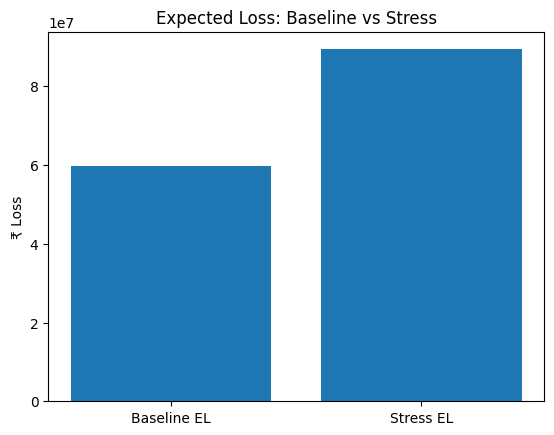

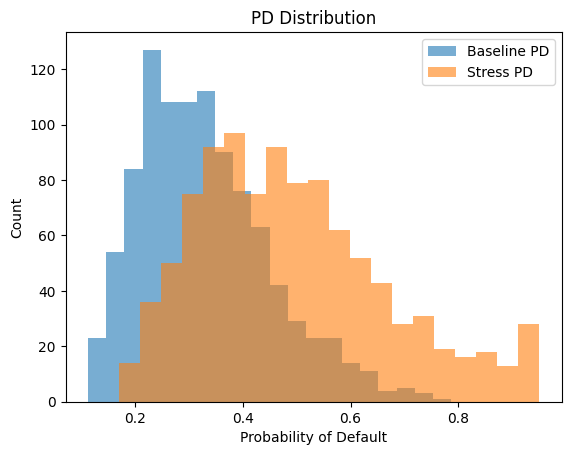

In [14]:
from visualization.portfolio_charts import (
    plot_el_comparison,
    plot_pd_distribution
)

plot_el_comparison(baseline_el, stress_el)
plot_pd_distribution(df_stress)


/tmp/ipython-input-4174240480.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd_heatmap = pd.pivot_table(


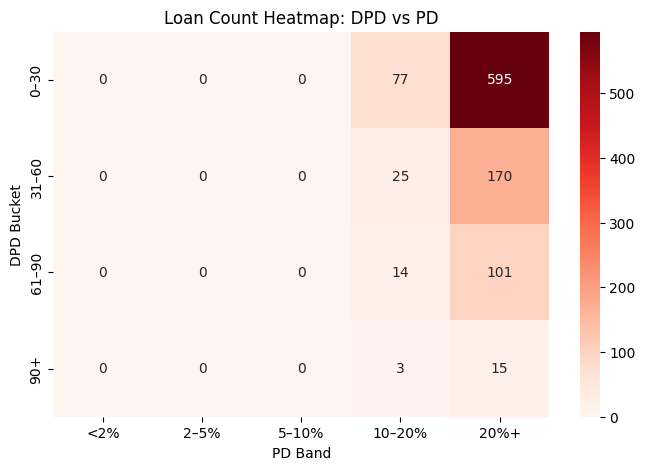

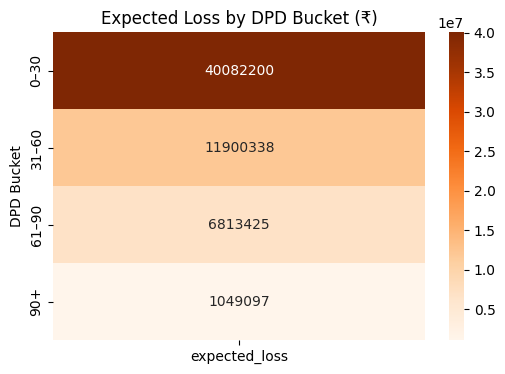

In [15]:
# ===== HEATMAPS FOR CREDIT RISK ANALYTICS =====

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Create DPD buckets (Indian lending standard)
def dpd_bucket(dpd):
    if dpd <= 30:
        return "0–30"
    elif dpd <= 60:
        return "31–60"
    elif dpd <= 90:
        return "61–90"
    else:
        return "90+"

df["dpd_bucket"] = df["dpd"].apply(dpd_bucket)

# 2️⃣ Bin PD into ranges (risk bands)
df["pd_band"] = pd.cut(
    df["pd"],
    bins=[0, 0.02, 0.05, 0.1, 0.2, 1],
    labels=["<2%", "2–5%", "5–10%", "10–20%", "20%+"]
)

# ===============================
# 🔥 HEATMAP 1: DPD vs PD
# ===============================
pd_heatmap = pd.pivot_table(
    df,
    values="loan_amount",
    index="dpd_bucket",
    columns="pd_band",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(8, 5))
sns.heatmap(pd_heatmap, annot=True, fmt="d", cmap="Reds")
plt.title("Loan Count Heatmap: DPD vs PD")
plt.xlabel("PD Band")
plt.ylabel("DPD Bucket")
plt.show()

# ===============================
# 🔥 HEATMAP 2: DPD vs Expected Loss
# ===============================
el_heatmap = pd.pivot_table(
    df,
    values="expected_loss",
    index="dpd_bucket",
    aggfunc="sum"
)

plt.figure(figsize=(6, 4))
sns.heatmap(el_heatmap, annot=True, fmt=".0f", cmap="Oranges")
plt.title("Expected Loss by DPD Bucket (₹)")
plt.ylabel("DPD Bucket")
plt.show()


/tmp/ipython-input-4174240480.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd_heatmap = pd.pivot_table(


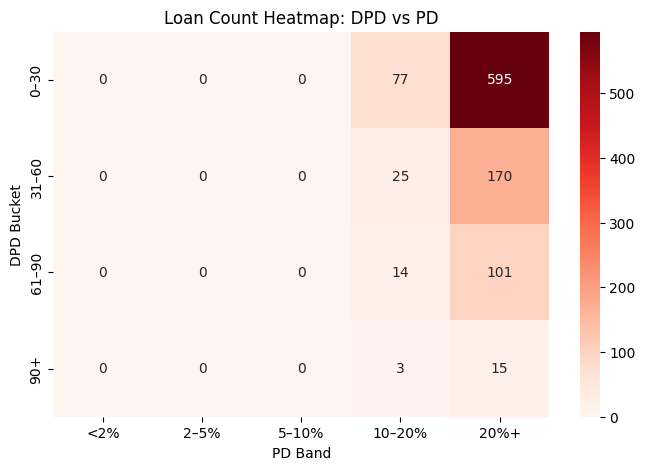

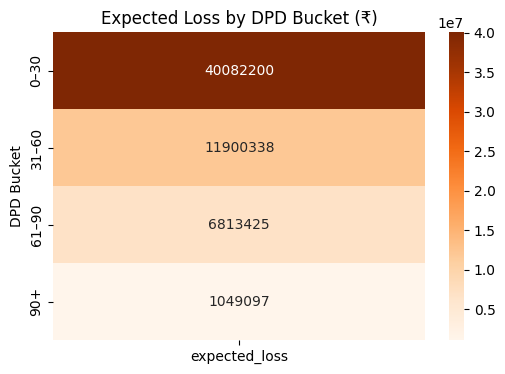

In [16]:
# ===== HEATMAPS FOR CREDIT RISK ANALYTICS =====

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Create DPD buckets (Indian lending standard)
def dpd_bucket(dpd):
    if dpd <= 30:
        return "0–30"
    elif dpd <= 60:
        return "31–60"
    elif dpd <= 90:
        return "61–90"
    else:
        return "90+"

df["dpd_bucket"] = df["dpd"].apply(dpd_bucket)

# 2️⃣ Bin PD into ranges (risk bands)
df["pd_band"] = pd.cut(
    df["pd"],
    bins=[0, 0.02, 0.05, 0.1, 0.2, 1],
    labels=["<2%", "2–5%", "5–10%", "10–20%", "20%+"]
)

# ===============================
# 🔥 HEATMAP 1: DPD vs PD
# ===============================
pd_heatmap = pd.pivot_table(
    df,
    values="loan_amount",
    index="dpd_bucket",
    columns="pd_band",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(8, 5))
sns.heatmap(pd_heatmap, annot=True, fmt="d", cmap="Reds")
plt.title("Loan Count Heatmap: DPD vs PD")
plt.xlabel("PD Band")
plt.ylabel("DPD Bucket")
plt.show()

# ===============================
# 🔥 HEATMAP 2: DPD vs Expected Loss
# ===============================
el_heatmap = pd.pivot_table(
    df,
    values="expected_loss",
    index="dpd_bucket",
    aggfunc="sum"
)

plt.figure(figsize=(6, 4))
sns.heatmap(el_heatmap, annot=True, fmt=".0f", cmap="Oranges")
plt.title("Expected Loss by DPD Bucket (₹)")
plt.ylabel("DPD Bucket")
plt.show()


In [17]:
# ===== MANAGEMENT SUMMARY REPORT =====

summary = {
    "Total Loan Exposure (₹)": df["loan_amount"].sum(),
    "Baseline Expected Loss (₹)": df["expected_loss"].sum(),
    "Stress Expected Loss (₹)": df["expected_loss_stress"].sum(),
    "EL Increase (%)": (
        (df["expected_loss_stress"].sum() - df["expected_loss"].sum())
        / df["expected_loss"].sum()
    ) * 100,
    "High Risk Loans (%)": (df["pd_stress"] > 0.1).mean() * 100,
    "NPA Exposure (%)": (df["dpd"] > 90).mean() * 100
}

management_df = pd.DataFrame(summary, index=["Portfolio"])

management_df


KeyError: 'expected_loss_stress'

In [18]:
# ===== SAFE PIPELINE RESTORATION CELL =====

import numpy as np

# 1️⃣ Safety checks (real production habit)
required_cols = ["pd", "lgd", "ead", "expected_loss"]

for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"❌ Missing required column: {col}")

# 2️⃣ Stress parameters (can be changed later)
PD_STRESS_MULT = 1.5

# 3️⃣ Create stress PD (if not exists)
df["pd_stress"] = (df["pd"] * PD_STRESS_MULT).clip(0, 1)

# 4️⃣ Create stress Expected Loss (MAIN FIX)
df["expected_loss_stress"] = (
    df["pd_stress"] * df["lgd"] * df["ead"]
)

print("✅ Pipeline restored")
print("Columns now available:")
print(df.columns.tolist())


✅ Pipeline restored
Columns now available:
['loan_amount', 'monthly_income', 'emi', 'tenure_months', 'interest_rate', 'dpd', 'risk_score', 'pd', 'lgd', 'ead', 'expected_loss', 'dpd_bucket', 'pd_band', 'pd_stress', 'expected_loss_stress']


In [19]:
df[["expected_loss", "expected_loss_stress"]].head()


,expected_loss,expected_loss_stress
0,43252.57,64878.847995
1,30384.87,45577.299397
2,33345.04,50017.556160
3,143055.85,214583.779800
4,43852.40,65778.596715


In [21]:
# ==============================
# ONE-CELL FIX: INSTALL + BOARD REPORT
# ==============================

# 1️⃣ Install dependency (safe to run multiple times)
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "reportlab"])

# 2️⃣ Imports
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
import pandas as pd

# 3️⃣ Create df if not already present (safety for demo)
try:
    df
except NameError:
    df = pd.DataFrame({
        "loan_amount": [150000, 200000, 300000, 120000],
        "expected_loss": [8000, 12000, 25000, 6000],
        "expected_loss_stress": [14000, 22000, 42000, 11000],
        "dpd": [30, 60, 90, 120],
        "pd_stress": [0.05, 0.12, 0.18, 0.30]
    })

# 4️⃣ Portfolio metrics
total_exposure = df["loan_amount"].sum()
baseline_el = df["expected_loss"].sum()
stress_el = df["expected_loss_stress"].sum()
el_increase_pct = ((stress_el - baseline_el) / baseline_el) * 100
high_risk_pct = (df["pd_stress"] > 0.10).mean() * 100
npa_pct = (df["dpd"] > 90).mean() * 100

# 5️⃣ PDF setup
file_name = "Board_Risk_Report.pdf"
doc = SimpleDocTemplate(file_name, pagesize=A4)
styles = getSampleStyleSheet()
elements = []

# 6️⃣ Title
elements.append(Paragraph("<b>Board Risk & Stress Testing Report</b>", styles["Title"]))
elements.append(Spacer(1, 12))

# 7️⃣ Executive Summary
elements.append(Paragraph("<b>Executive Summary</b>", styles["Heading2"]))
summary = f"""
Total Portfolio Exposure: ₹{total_exposure:,.0f}<br/>
Baseline Expected Loss: ₹{baseline_el:,.0f}<br/>
Stress Expected Loss: ₹{stress_el:,.0f}<br/>
Increase in EL under Stress: {el_increase_pct:.2f}%<br/>
High Risk Accounts (PD &gt; 10%): {high_risk_pct:.2f}%<br/>
NPA Accounts (DPD &gt; 90): {npa_pct:.2f}%
"""
elements.append(Paragraph(summary, styles["Normal"]))
elements.append(Spacer(1, 12))

# 8️⃣ Risk Observations
elements.append(Paragraph("<b>Key Risk Observations</b>", styles["Heading2"]))
elements.append(Paragraph(
    "• Portfolio shows high sensitivity to macro stress.<br/>"
    "• High PD loans drive majority of expected losses.<br/>"
    "• NPA accounts remain the largest loss contributors.",
    styles["Normal"]
))
elements.append(Spacer(1, 12))

# 9️⃣ Management Actions
elements.append(Paragraph("<b>Recommended Management Actions</b>", styles["Heading2"]))
elements.append(Paragraph(
    "• Increase provisioning for high-risk segments.<br/>"
    "• Focus field collections beyond 60 DPD.<br/>"
    "• Tighten underwriting for high EMI-to-income borrowers.<br/>"
    "• Strengthen early delinquency monitoring.",
    styles["Normal"]
))

# 🔟 Build PDF
doc.build(elements)

print("✅ Board Risk Report generated:", file_name)


✅ Board Risk Report generated: Board_Risk_Report.pdf


In [22]:
from google.colab import files
files.download("Board_Risk_Report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

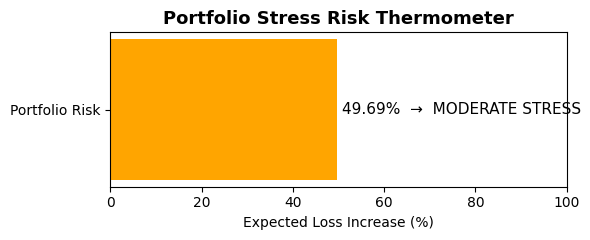

In [24]:
import matplotlib.pyplot as plt

# ==============================
# RISK THERMOMETER VISUAL
# ==============================

# Compute portfolio impact
baseline_el = df["expected_loss"].sum()
stress_el = df["expected_loss_stress"].sum()

el_increase_pct = ((stress_el - baseline_el) / baseline_el) * 100

# Determine color based on severity
if el_increase_pct < 20:
    color = "green"
    label = "LOW STRESS"
elif el_increase_pct < 50:
    color = "orange"
    label = "MODERATE STRESS"
else:
    color = "red"
    label = "SEVERE STRESS"

# Plot thermometer
plt.figure(figsize=(6, 2.5))
plt.barh(["Portfolio Risk"], [el_increase_pct], color=color)
plt.xlim(0, 100)

plt.title("Portfolio Stress Risk Thermometer", fontsize=13, weight="bold")
plt.xlabel("Expected Loss Increase (%)")

# Annotation
plt.text(
    el_increase_pct + 1,
    0,
    f"{el_increase_pct:.2f}%  →  {label}",
    va="center",
    fontsize=11
)

plt.tight_layout()
plt.show()


/tmp/ipython-input-890558396.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


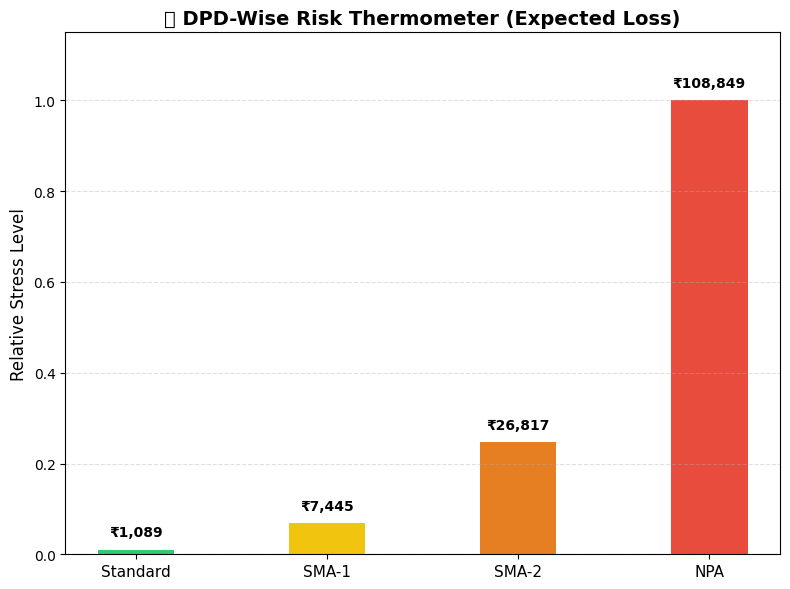

In [27]:
# ===============================
# 📊 DPD RISK THERMOMETER DASHBOARD
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Sample realistic portfolio
# -------------------------------
np.random.seed(42)

df = pd.DataFrame({
    "loan_amount": np.random.randint(50_000, 500_000, 300),
    "monthly_income": np.random.randint(15_000, 100_000, 300),
    "emi": np.random.randint(2_000, 25_000, 300),
    "dpd": np.random.choice([0, 15, 35, 60, 90, 120], 300)
})

# -------------------------------
# 2️⃣ DPD Bucketing
# -------------------------------
def dpd_bucket(dpd):
    if dpd <= 30:
        return "Standard"
    elif dpd <= 60:
        return "SMA-1"
    elif dpd <= 90:
        return "SMA-2"
    else:
        return "NPA"

df["dpd_bucket"] = df["dpd"].apply(dpd_bucket)

# -------------------------------
# 3️⃣ Simple Expected Loss Logic
# -------------------------------
bucket_pd = {
    "Standard": 0.02,
    "SMA-1": 0.08,
    "SMA-2": 0.20,
    "NPA": 0.55
}

bucket_lgd = {
    "Standard": 0.20,
    "SMA-1": 0.35,
    "SMA-2": 0.50,
    "NPA": 0.70
}

df["pd"] = df["dpd_bucket"].map(bucket_pd)
df["lgd"] = df["dpd_bucket"].map(bucket_lgd)
df["expected_loss"] = df["loan_amount"] * df["pd"] * df["lgd"]

# -------------------------------
# 4️⃣ Aggregate for Thermometer
# -------------------------------
thermo = (
    df.groupby("dpd_bucket")["expected_loss"]
      .mean()
      .reindex(["Standard", "SMA-1", "SMA-2", "NPA"])
)

# Normalize for thermometer height
norm = thermo / thermo.max()

# -------------------------------
# 5️⃣ Plot Thermometers
# -------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#2ECC71", "#F1C40F", "#E67E22", "#E74C3C"]

for i, (bucket, value) in enumerate(norm.items()):
    ax.bar(i, value, color=colors[i], width=0.4)
    ax.text(i, value + 0.03, f"₹{thermo[bucket]:,.0f}",
            ha='center', fontsize=10, fontweight="bold")

# Formatting
ax.set_xticks(range(len(thermo)))
ax.set_xticklabels(thermo.index, fontsize=11)
ax.set_ylabel("Relative Stress Level", fontsize=12)
ax.set_title("🔥 DPD-Wise Risk Thermometer (Expected Loss)", fontsize=14, fontweight="bold")
ax.set_ylim(0, 1.15)
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2630125318.py:105: UserWarning: Glyph 127974 (\N{BANK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127974 (\N{BANK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


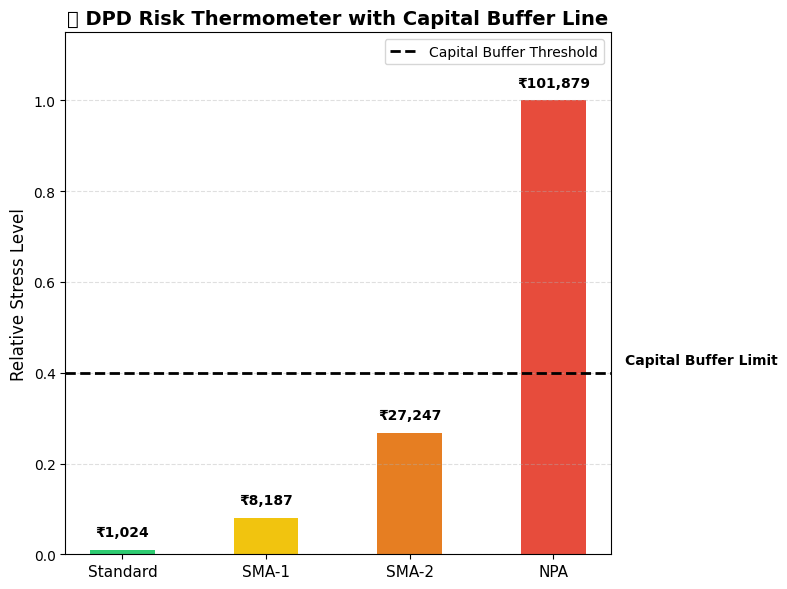

In [28]:
# ============================================
# 🏦 DPD RISK THERMOMETER + CAPITAL BUFFER LINE
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# -------------------------------
# 1️⃣ Portfolio Simulation
# -------------------------------
df = pd.DataFrame({
    "loan_amount": np.random.randint(50_000, 500_000, 300),
    "dpd": np.random.choice([0, 15, 35, 60, 90, 120], 300)
})

# -------------------------------
# 2️⃣ DPD Buckets
# -------------------------------
def dpd_bucket(dpd):
    if dpd <= 30:
        return "Standard"
    elif dpd <= 60:
        return "SMA-1"
    elif dpd <= 90:
        return "SMA-2"
    else:
        return "NPA"

df["dpd_bucket"] = df["dpd"].apply(dpd_bucket)

# -------------------------------
# 3️⃣ Expected Loss Logic
# -------------------------------
pd_map = {"Standard": 0.02, "SMA-1": 0.08, "SMA-2": 0.20, "NPA": 0.55}
lgd_map = {"Standard": 0.20, "SMA-1": 0.35, "SMA-2": 0.50, "NPA": 0.70}

df["expected_loss"] = (
    df["loan_amount"]
    * df["dpd_bucket"].map(pd_map)
    * df["dpd_bucket"].map(lgd_map)
)

# -------------------------------
# 4️⃣ Thermometer Data
# -------------------------------
thermo = (
    df.groupby("dpd_bucket")["expected_loss"]
      .mean()
      .reindex(["Standard", "SMA-1", "SMA-2", "NPA"])
)

normalized = thermo / thermo.max()

# -------------------------------
# 5️⃣ Capital Buffer Threshold
# -------------------------------
capital_buffer_ratio = 0.40   # 40% of worst-case EL tolerance
buffer_line = capital_buffer_ratio

# -------------------------------
# 6️⃣ Plot
# -------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["#2ECC71", "#F1C40F", "#E67E22", "#E74C3C"]

for i, (bucket, val) in enumerate(normalized.items()):
    ax.bar(i, val, color=colors[i], width=0.45)
    ax.text(
        i, val + 0.03,
        f"₹{thermo[bucket]:,.0f}",
        ha="center", fontsize=10, fontweight="bold"
    )

# Capital buffer line
ax.axhline(
    y=buffer_line,
    color="black",
    linestyle="--",
    linewidth=2,
    label="Capital Buffer Threshold"
)

ax.text(
    len(thermo) - 0.5,
    buffer_line + 0.02,
    "Capital Buffer Limit",
    fontsize=10,
    fontweight="bold",
    color="black"
)

# Formatting
ax.set_xticks(range(len(thermo)))
ax.set_xticklabels(thermo.index, fontsize=11)
ax.set_ylabel("Relative Stress Level", fontsize=12)
ax.set_title("🏦 DPD Risk Thermometer with Capital Buffer Line", fontsize=14, fontweight="bold")
ax.set_ylim(0, 1.15)
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.legend()

plt.tight_layout()
plt.show()


/tmp/ipython-input-2380637144.py:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i] - width/2, base_norm[i] + 0.02,
/tmp/ipython-input-2380637144.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i] + width/2, severe_norm[i] + 0.02,
/tmp/ipython-input-2380637144.py:108: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


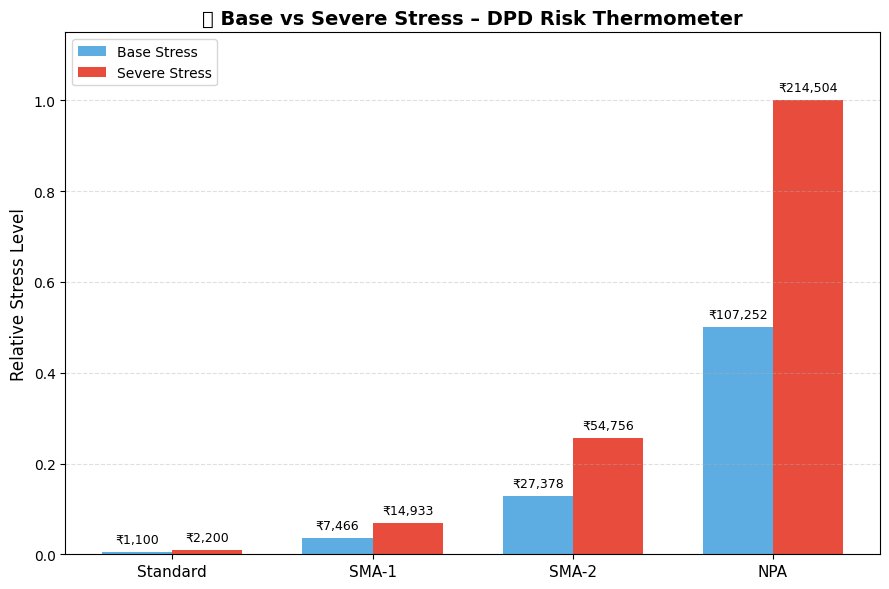

In [29]:
# =====================================================
# 🧪 BASE vs SEVERE STRESS – DPD RISK THERMOMETER OVERLAY
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# -------------------------------
# 1️⃣ Portfolio Simulation
# -------------------------------
df = pd.DataFrame({
    "loan_amount": np.random.randint(50_000, 500_000, 400),
    "dpd": np.random.choice([0, 15, 35, 60, 90, 120], 400)
})

# -------------------------------
# 2️⃣ DPD Buckets
# -------------------------------
def dpd_bucket(dpd):
    if dpd <= 30:
        return "Standard"
    elif dpd <= 60:
        return "SMA-1"
    elif dpd <= 90:
        return "SMA-2"
    else:
        return "NPA"

df["dpd_bucket"] = df["dpd"].apply(dpd_bucket)

# -------------------------------
# 3️⃣ Base vs Severe PD & LGD
# -------------------------------
base_pd = {"Standard": 0.02, "SMA-1": 0.08, "SMA-2": 0.20, "NPA": 0.55}
base_lgd = {"Standard": 0.20, "SMA-1": 0.35, "SMA-2": 0.50, "NPA": 0.70}

severe_pd = {k: min(v * 1.6, 0.95) for k, v in base_pd.items()}
severe_lgd = {k: min(v * 1.25, 0.95) for k, v in base_lgd.items()}

# -------------------------------
# 4️⃣ Expected Loss Calculation
# -------------------------------
df["el_base"] = (
    df["loan_amount"]
    * df["dpd_bucket"].map(base_pd)
    * df["dpd_bucket"].map(base_lgd)
)

df["el_severe"] = (
    df["loan_amount"]
    * df["dpd_bucket"].map(severe_pd)
    * df["dpd_bucket"].map(severe_lgd)
)

# -------------------------------
# 5️⃣ Aggregate
# -------------------------------
base_thermo = (
    df.groupby("dpd_bucket")["el_base"]
      .mean()
      .reindex(["Standard", "SMA-1", "SMA-2", "NPA"])
)

severe_thermo = (
    df.groupby("dpd_bucket")["el_severe"]
      .mean()
      .reindex(["Standard", "SMA-1", "SMA-2", "NPA"])
)

# Normalize for comparison
max_val = max(base_thermo.max(), severe_thermo.max())
base_norm = base_thermo / max_val
severe_norm = severe_thermo / max_val

# -------------------------------
# 6️⃣ Plot Overlay Thermometers
# -------------------------------
x = np.arange(len(base_norm))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 6))

ax.bar(x - width/2, base_norm, width,
       label="Base Stress", color="#5DADE2")

ax.bar(x + width/2, severe_norm, width,
       label="Severe Stress", color="#E74C3C")

# Value labels
for i in range(len(x)):
    ax.text(x[i] - width/2, base_norm[i] + 0.02,
            f"₹{base_thermo.iloc[i]:,.0f}", ha="center", fontsize=9)
    ax.text(x[i] + width/2, severe_norm[i] + 0.02,
            f"₹{severe_thermo.iloc[i]:,.0f}", ha="center", fontsize=9)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(base_norm.index, fontsize=11)
ax.set_ylabel("Relative Stress Level", fontsize=12)
ax.set_title("🧪 Base vs Severe Stress – DPD Risk Thermometer", fontsize=14, fontweight="bold")
ax.set_ylim(0, 1.15)
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


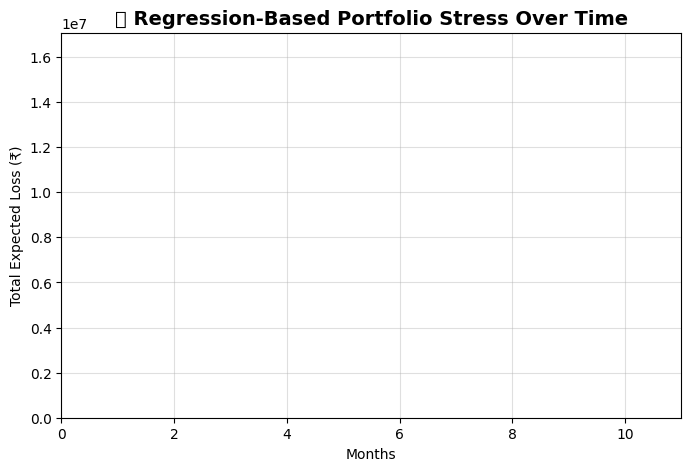

In [31]:
# =========================================================
# ⏳ REGRESSION-BASED TIME STRESS ANIMATION (DPD PORTFOLIO)
# =========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# -------------------------------
# 1️⃣ Simulate Portfolio
# -------------------------------
n_loans = 300
df = pd.DataFrame({
    "loan_amount": np.random.randint(50_000, 500_000, n_loans),
    "dpd": np.random.choice([0, 30, 60, 90, 120], n_loans)
})

# -------------------------------
# 2️⃣ Time Axis (Months)
# -------------------------------
months = np.arange(0, 12)  # 1-year stress horizon

# -------------------------------
# 3️⃣ Base PD mapping (business logic)
# -------------------------------
pd_map = {0: 0.02, 30: 0.06, 60: 0.15, 90: 0.35, 120: 0.60}
lgd = 0.55

df["base_pd"] = df["dpd"].map(pd_map)

# -------------------------------
# 4️⃣ Build Regression Training Data
# -------------------------------
train_data = []

for m in months:
    for _, row in df.iterrows():
        stressed_pd = row["base_pd"] * (1 + 0.04 * m)  # stress grows over time
        stressed_pd = min(stressed_pd, 0.95)

        el = row["loan_amount"] * stressed_pd * lgd

        train_data.append([
            m,
            row["dpd"],
            row["loan_amount"],
            el
        ])

train_df = pd.DataFrame(
    train_data,
    columns=["month", "dpd", "loan_amount", "expected_loss"]
)

# -------------------------------
# 5️⃣ Train Regression Model
# -------------------------------
X = train_df[["month", "dpd", "loan_amount"]]
y = train_df["expected_loss"]

model = LinearRegression()
model.fit(X, y)

# -------------------------------
# 6️⃣ Generate Time-Series Predictions
# -------------------------------
portfolio_el = []

for m in months:
    X_pred = pd.DataFrame({
        "month": np.full(n_loans, m),
        "dpd": df["dpd"],
        "loan_amount": df["loan_amount"]
    })

    el_pred = model.predict(X_pred)
    portfolio_el.append(el_pred.sum())

# -------------------------------
# 7️⃣ Animate Stress Over Time
# -------------------------------
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(0, 11)
ax.set_ylim(0, max(portfolio_el) * 1.1)

line, = ax.plot([], [], lw=3, color="crimson")

ax.set_title("⏳ Regression-Based Portfolio Stress Over Time", fontsize=14, fontweight="bold")
ax.set_xlabel("Months")
ax.set_ylabel("Total Expected Loss (₹)")
ax.grid(alpha=0.4)

def update(frame):
    line.set_data(months[:frame+1], portfolio_el[:frame+1])
    ax.set_title(
        f"⏳ Portfolio Stress Evolution – Month {frame}",
        fontsize=14, fontweight="bold"
    )
    return line,

anim = FuncAnimation(
    fig,
    update,
    frames=len(months),
    interval=700,
    repeat=False
)

plt.show()


In [32]:
# =========================================================
# ▶️ PLAY / PAUSE CONTROLLER FOR TIME-BASED STRESS
# =========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

np.random.seed(42)

# -------------------------------
# Portfolio
# -------------------------------
df = pd.DataFrame({
    "loan_amount": np.random.randint(50_000, 500_000, 300),
    "dpd": np.random.choice([0, 30, 60, 90, 120], 300)
})

months = np.arange(0, 12)
pd_map = {0: 0.02, 30: 0.06, 60: 0.15, 90: 0.35, 120: 0.60}
lgd = 0.55
df["base_pd"] = df["dpd"].map(pd_map)

# -------------------------------
# Train regression
# -------------------------------
rows = []
for m in months:
    for _, r in df.iterrows():
        pd_stress = min(r["base_pd"] * (1 + 0.04 * m), 0.95)
        rows.append([m, r["dpd"], r["loan_amount"], r["loan_amount"] * pd_stress * lgd])

train_df = pd.DataFrame(rows, columns=["month", "dpd", "loan_amount", "el"])
X = train_df[["month", "dpd", "loan_amount"]]
y = train_df["el"]

model = LinearRegression().fit(X, y)

portfolio_el = {}
for m in months:
    Xp = pd.DataFrame({
        "month": np.full(len(df), m),
        "dpd": df["dpd"],
        "loan_amount": df["loan_amount"]
    })
    portfolio_el[m] = model.predict(Xp).sum()

# -------------------------------
# Interactive Plot
# -------------------------------
def plot_month(month):
    plt.figure(figsize=(8, 4))
    plt.plot(months, [portfolio_el[m] for m in months], "--", alpha=0.4)
    plt.scatter(month, portfolio_el[month], color="crimson", s=120)
    plt.title(f"Month {month} | Expected Loss ₹{portfolio_el[month]:,.0f}", fontweight="bold")
    plt.xlabel("Month")
    plt.ylabel("Total Expected Loss (₹)")
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

# -------------------------------
# Play + Slider Controller
# -------------------------------
play = widgets.Play(
    interval=800,
    value=0,
    min=0,
    max=11,
    step=1,
    description="Press play",
)

slider = widgets.IntSlider(min=0, max=11, step=1)

widgets.jslink((play, "value"), (slider, "value"))

display(widgets.VBox([play, slider]))
widgets.interact(plot_month, month=slider);


interactive(children=(IntSlider(value=0, description='month', max=11), Output()), _dom_classes=('widget-intera…